# Ethereum Crypto Trend Analysis with OpenBB


## Description
This notebook showcases the application of technical analysis techniques to explore Ethereum price trends and volatility.
It utilizes OpenBB's historical data to calculate and visualize moving averages, analyze trading volume, and assess price volatility.
The notebook demonstrates how these tools can be employed to gain insights into market dynamics and potentially inform investment decisions.

#### Author
[MacBobby Chibuzor](https://github.com/theghostmac)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KwDtij9ln1UjdJOYKOGltUkaPctrqWGz?authuser=0#scrollTo=HeB3TlvkmFoK)

The dependencies for running this includes openbb, pandas, and matplotlib.



In [2]:
!pip install openbb -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.4/273.4 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 k

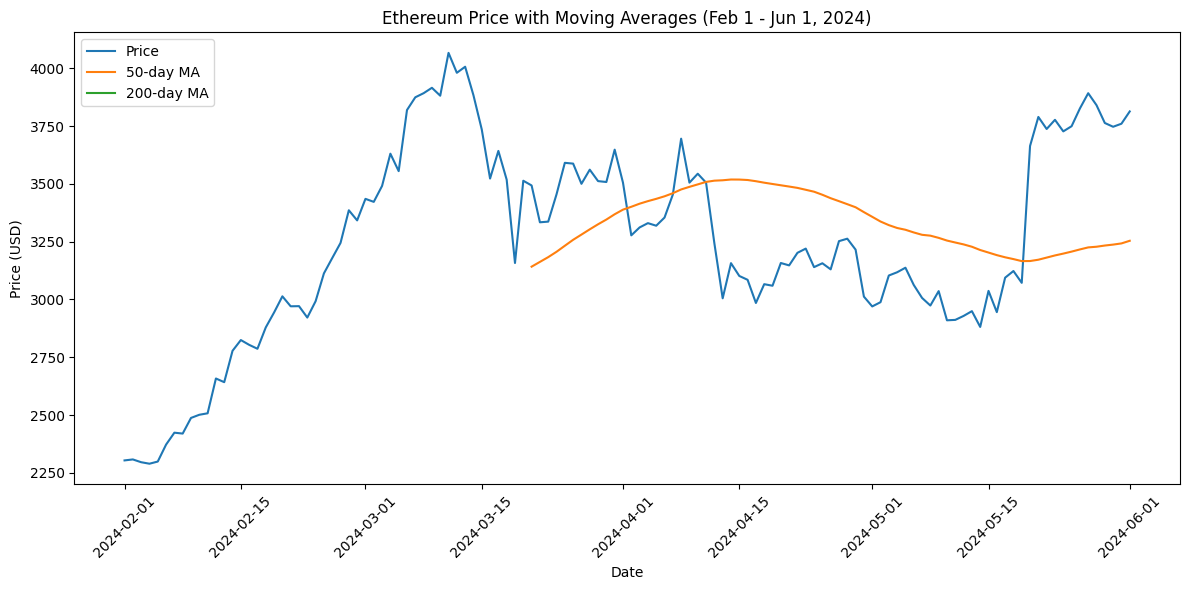

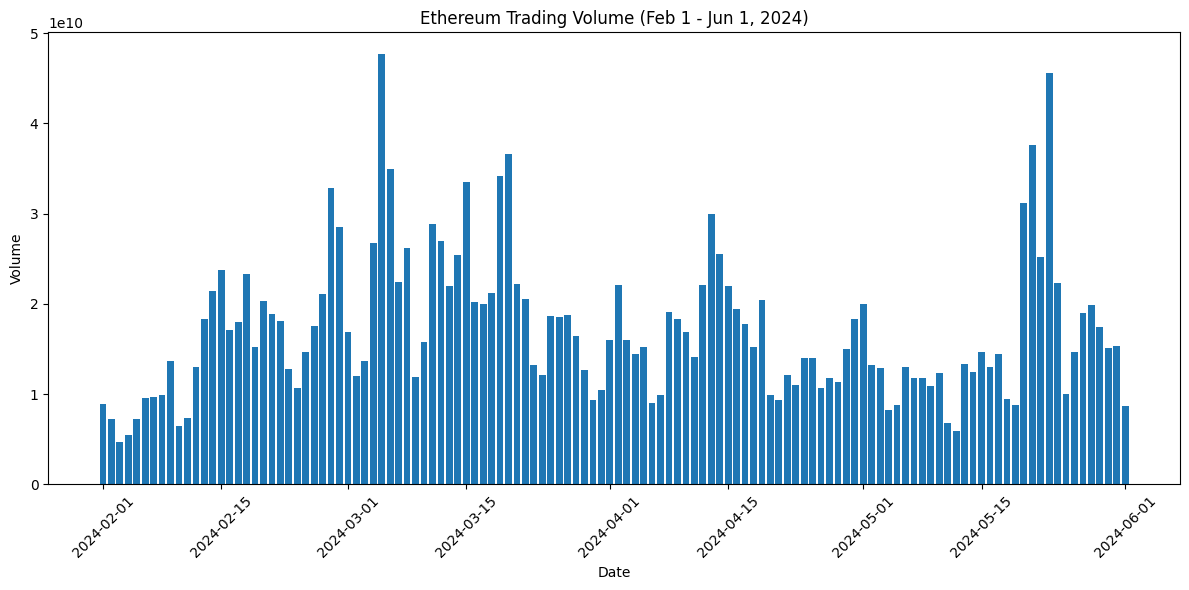

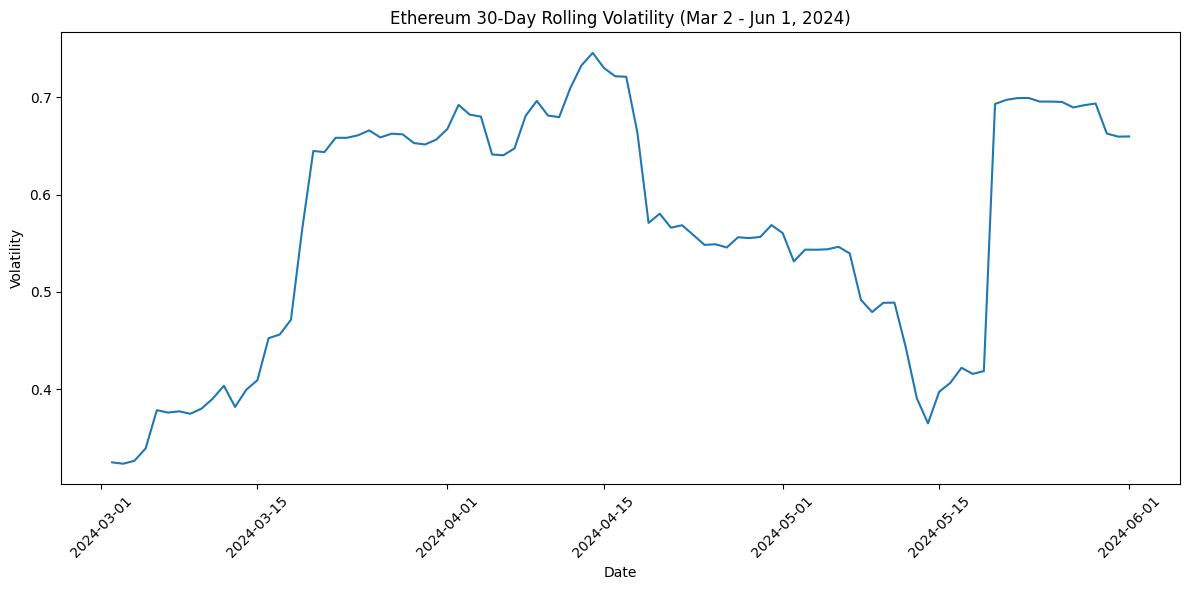


Quantitative Analysis:
Current Price: $3813.20
Price Change (Start to End): 65.52%
Highest Price: $4092.28
Lowest Price: $2243.57
Average Daily Return: 0.48%
Average Daily Volume: 17127538949
Current Volatility: 65.97%

Trading Signals based on MA Crossover:
Empty DataFrame
Columns: [close, MA50, MA200]
Index: []
Empty DataFrame
Columns: [close, MA50, MA200]
Index: []

RSI Analysis:
Current RSI: 76.82
Overbought periods (RSI > 70):
                  close        RSI
date                              
2024-02-14  2777.902344  93.050995
2024-02-15  2824.378906  93.591907
2024-02-16  2803.691406  90.392200
2024-02-17  2786.672607  89.658763
2024-02-18  2878.998047  91.840526
2024-02-19  2943.574707  92.433809
2024-02-20  3013.503662  92.399952
2024-02-21  2970.355469  86.545067
2024-02-22  2971.007324  87.002967
2024-02-23  2921.658203  79.882704
2024-02-24  2992.385986  81.346773
2024-02-25  3112.697266  83.715729
2024-02-26  3178.993652  82.028537
2024-02-27  3244.519287  84.908150
202

In [5]:
from openbb import obb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download historical Ethereum (ETH) to USD price data
eth_data = obb.crypto.price.historical(symbol='ETH-USD', interval='1d', start_date='2024-02-01', end_date='2024-06-01')

# Convert to DataFrame
df = eth_data.to_df()

# Calculate moving averages
df['MA50'] = df['close'].rolling(window=50).mean()
df['MA200'] = df['close'].rolling(window=200).mean()

# Calculate daily returns and volatility
df['Daily_Return'] = df['close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(252)

# Visualize the Ethereum price trend with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Price')
plt.plot(df.index, df['MA50'], label='50-day MA')
plt.plot(df.index, df['MA200'], label='200-day MA')
plt.title('Ethereum Price with Moving Averages (Feb 1 - Jun 1, 2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze daily trading volume for Ethereum
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['volume'])
plt.title('Ethereum Trading Volume (Feb 1 - Jun 1, 2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the 30-day rolling volatility of Ethereum prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[30:], df['Volatility'].iloc[30:])
plt.title('Ethereum 30-Day Rolling Volatility (Mar 2 - Jun 1, 2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional quantitative analysis
print("\nQuantitative Analysis:")
print(f"Current Price: ${df['close'].iloc[-1]:.2f}")
print(f"Price Change (Start to End): {((df['close'].iloc[-1] / df['close'].iloc[0]) - 1) * 100:.2f}%")
print(f"Highest Price: ${df['high'].max():.2f}")
print(f"Lowest Price: ${df['low'].min():.2f}")
print(f"Average Daily Return: {df['Daily_Return'].mean() * 100:.2f}%")
print(f"Average Daily Volume: {df['volume'].mean():.0f}")
print(f"Current Volatility: {df['Volatility'].iloc[-1] * 100:.2f}%")

# Identify potential buy/sell signals based on moving average crossovers
df['Signal'] = np.where(df['MA50'] > df['MA200'], 1, 0)
df['Position'] = df['Signal'].diff()

print("\nTrading Signals based on MA Crossover:")
print(df[df['Position'] == 1][['close', 'MA50', 'MA200']].to_string())  # Buy signals
print(df[df['Position'] == -1][['close', 'MA50', 'MA200']].to_string())  # Sell signals

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['close'])

print("\nRSI Analysis:")
print(f"Current RSI: {df['RSI'].iloc[-1]:.2f}")
print("Overbought periods (RSI > 70):")
print(df[df['RSI'] > 70][['close', 'RSI']].to_string())
print("\nOversold periods (RSI < 30):")
print(df[df['RSI'] < 30][['close', 'RSI']].to_string())

print("\nEthereum price and volume analysis completed!")